![](http://www.kiplinger.com/kipimages/pages/14024.jpg)

# An Extensive Medicare Data Exploration - Healthcare Analysis

## About Medicare 

In the United States, Medicare is a single-payer, national social insurance program administered by the U.S. federal government since 1966. United States Medicare is funded by a payroll tax, premiums and surtaxes from beneficiaries, and general revenue. It provides health insurance for Americans aged 65 and older who have worked and paid into the system through the payroll tax. It also provides health insurance to younger people with some disability status as determined by the Social Security Administration, as well as people with end stage renal disease and amyotrophic lateral sclerosis.

In 2015, Medicare provided health insurance for over **55 million** (46 million people age 65 and older and 9 million younger people). On average, Medicare covers about half of the health care charges for those enrolled. The enrollees must then cover their remaining costs either with supplemental insurance, separate insurance, or out-of-pocket. Out-of-pocket costs can vary depending on the amount of health care a Medicare enrollee needs. 

## About CMS

The Centers for Medicare & Medicaid Services (CMS), previously known as the Health Care Financing Administration (HCFA), is a federal agency within the United States Department of Health and Human Services (HHS) that administers the Medicare program and works in partnership with state governments to administer Medicaid, the Children's Health Insurance Program (CHIP), and health insurance portability standards. In addition to these programs, CMS has other responsibilities, including the administrative simplification standards from the Health Insurance Portability and Accountability Act of 1996 (HIPAA), quality standards in long-term care facilities (more commonly referred to as nursing homes) through its survey and certification process, clinical laboratory quality standards under the Clinical Laboratory Improvement Amendments, and oversight of HealthCare.gov.

## About the Data-Set

This [public dataset](https://www.kaggle.com/cms/cms-medicare) was created by the Centers for Medicare & Medicaid Services. The data summarizes the utilization and payments for procedures, services, and prescription drugs provided to Medicare beneficiaries by specific inpatient and outpatient hospitals, physicians, and other suppliers. The dataset includes the following data: Common inpatient and outpatient services, All physician and other supplier procedures and services, All Part D prescriptions. Providers determine what they will charge for items, services, and procedures provided to patients and these charges are the amount that providers bill for an item, service, or procedure.



## Contents

1. States having more nursing facilities  
2. HCC Scores - Which State and Which facilities have poor HCC scores  
&nbsp;&nbsp;&nbsp;&nbsp;  2.1 Max and Min HCC Scores for different States   
&nbsp;&nbsp;&nbsp;&nbsp;  2.2 Average HCC scores for different States  
&nbsp;&nbsp;&nbsp;&nbsp;  2.3 Facilities with High HCC scores  
&nbsp;&nbsp;&nbsp;&nbsp;  2.4 Facilities with Low HCC Scores
   

4. Which state has the largest number of stay days  
&nbsp;&nbsp;&nbsp;&nbsp;  4.1 States and their Average Total Stays (of different facilities) and Average length of stays    
  

5. Total Claims, Day Supply and Drug Costs  
&nbsp;&nbsp;&nbsp;&nbsp;  5.1 States having highest claims, supply, and cost      
&nbsp;&nbsp;&nbsp;&nbsp;  5.2 Drugs having highest claims, supply and cost      
&nbsp;&nbsp;&nbsp;&nbsp;  5.3 Nursing Specialities having highest claims, supply, and cost      




In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go

## 1. Cross-sectional data

### Provides samples of individuals, hospitals, cities at a given point in time


In [2]:
nursingFacilities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/nursing_facilities_2014.csv')

In [3]:
nursingFacilities['year']=2014

In [4]:
nursingFacilities[['year','provider_id','facility_name','street_address','city','state','total_stays','average_age','average_hcc_score']].head()

,year,provider_id,facility_name,street_address,city,state,total_stays,average_age,average_hcc_score
0,2014,235618,HEARTLAND HEALTH CARE CENTER-CANTON,7025 LILLEY ROAD,CANTON,MI,1104,79,2.29
1,2014,495217,MANORCARE HEALTH SERVICES-FAIR OAKS,12475 LEE JACKSON MEMORIAL HIGHWAY,FAIRFAX,VA,436,79,2.22
2,2014,495121,CHERRYDALE HEALTH AND REHABILITATION CENTER,3710 LEE HIGHWAY,ARLINGTON,VA,353,76,2.33
3,2014,225554,COOLIDGE HOUSE,30 WEBSTER STREET,BROOKLINE,MA,368,75,2.38
4,2014,235663,NOTTING HILL OF WEST BLOOMFIELD,6535 DRAKE ROAD,W BLOOMFIELD,MI,871,81,2.31


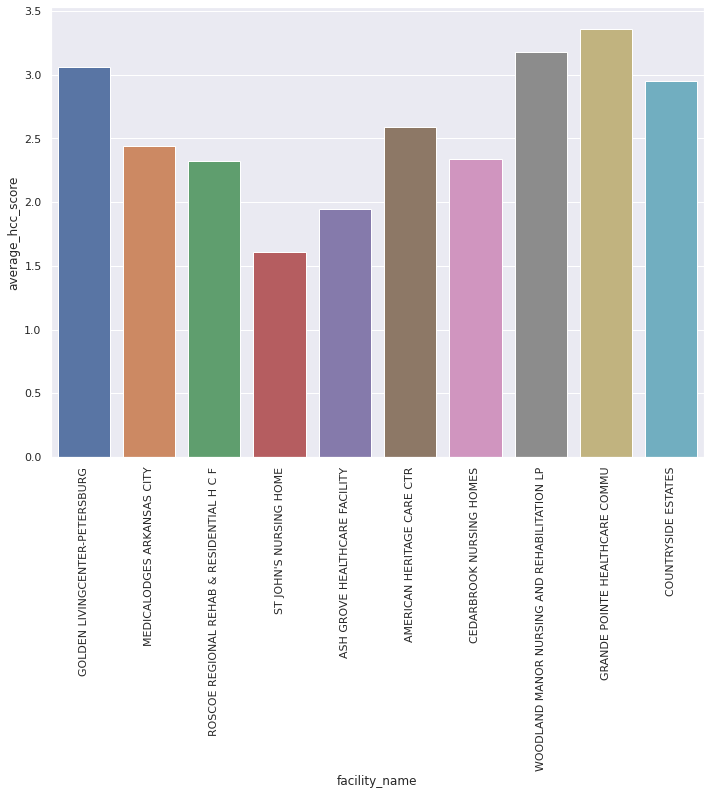

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(nursingFacilities.sample(10),x='facility_name',y='average_hcc_score')
plt.xticks(rotation=90);

## 2. Time series data

### Provides samples of specific factors from individual accross time

In [6]:
heartRateTimeSeries=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/heart_rate.csv')

In [17]:
heartRateTimeSeries.head(10)

,T1,T2,T3,T4
0,84.2697,91.4634,60.4839,59.2885
1,84.2697,91.4634,60.4839,59.2885
2,84.0619,91.1834,60.4606,59.2885
3,85.6542,91.8788,60.3391,58.8973
4,87.2093,91.1772,60.0762,58.4359
5,87.1246,89.7992,59.2526,58.7312
6,86.8726,90.3571,58.6644,59.1926
7,86.7052,92.0227,59.1295,58.9342
8,87.5899,91.9105,59.6737,58.4728
9,89.1475,91.1410,60.7760,57.8148


<Axes: >

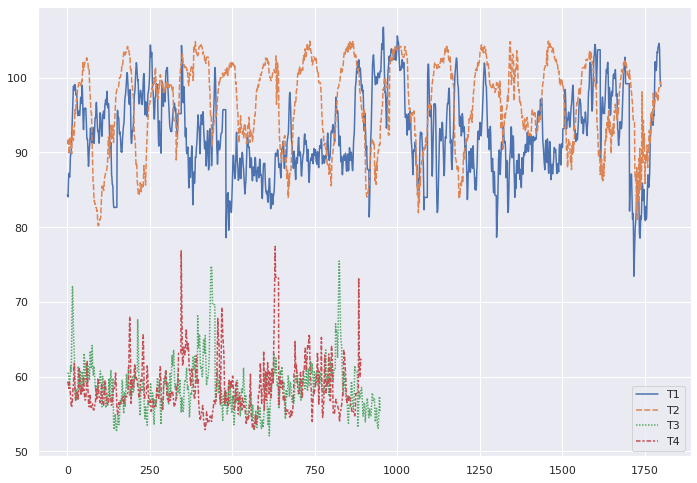

In [8]:
sns.lineplot(heartRateTimeSeries)

In [9]:
inpatient_charges_2011=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/inpatient_charges_2011.zip')

inpatient_charges_2012=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/inpatient_charges_2012.zip')

inpatient_charges_2013=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/inpatient_charges_2013.zip')

inpatient_charges_2014=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/inpatient_charges_2014.zip')

inpatient_charges_2015=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/inpatient_charges_2015.zip')


In [10]:
inpatient_charges_2011['year']=2011

inpatient_charges_2012['year']=2012


inpatient_charges_2013['year']=2013


inpatient_charges_2014['year']=2014


inpatient_charges_2015['year']=2015




In [11]:
inpatient_chargesDataFrame=pd.concat([inpatient_charges_2011,inpatient_charges_2012,inpatient_charges_2013,inpatient_charges_2014,inpatient_charges_2015])

In [12]:
Filter=inpatient_chargesDataFrame['drg_definition']=='069 - TRANSIENT ISCHEMIA'

In [13]:
inpatient_chargesDataFrame[Filter][['provider_id','provider_name','year','total_discharges','average_total_payments','average_medicare_payments']].sort_values(by='provider_id').head(20)

,provider_id,provider_name,year,total_discharges,average_total_payments,average_medicare_payments
86347,10001,SOUTHEAST ALABAMA MEDICAL CENTER,2014,59,4310.0,3348.0
86069,10001,SOUTHEAST ALABAMA MEDICAL CENTER,2015,62,4130.0,3045.0
63001,10001,SOUTHEAST ALABAMA MEDICAL CENTER,2013,48,4258.0,3378.0
66903,10001,SOUTHEAST ALABAMA MEDICAL CENTER,2011,37,4134.0,3103.0
64714,10001,SOUTHEAST ALABAMA MEDICAL CENTER,2012,58,3931.0,2945.0
62403,10005,MARSHALL MEDICAL CENTER SOUTH,2013,48,4370.0,3436.0
85696,10005,MARSHALL MEDICAL CENTER SOUTH,2014,33,4112.0,3087.0
66228,10005,MARSHALL MEDICAL CENTER SOUTH,2011,16,4273.0,3218.0
64101,10005,MARSHALL MEDICAL CENTER SOUTH,2012,48,4283.0,3149.0
85398,10005,MARSHALL MEDICAL CENTER SOUTH,2015,26,4224.0,3078.0


In [14]:
PanelData=inpatient_chargesDataFrame[Filter][['provider_id','provider_name','year','total_discharges','average_total_payments','average_medicare_payments']].sort_values(by='provider_id').head(20)

<Axes: xlabel='year', ylabel='total_discharges'>

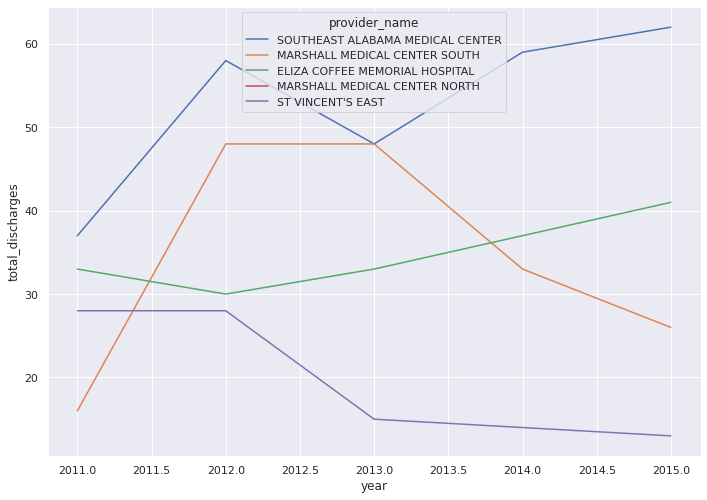

In [15]:
sns.lineplot(data=PanelData, x="year", y="total_discharges", hue="provider_name")